## A Paradoxical Problem

Suppose that you are organising a tournament in which $n$ each take turns to play one another exactly once. This is known as a round robin tournament. We can represent this visually using a complete oriented graph on $n$ vertices where a directed edge from vertex $v$ to $w$ means that player $v$ won the game against $w$. 

We should probably roughly define the terms that we just used. A complete graph on $n$ vertices is one where there is an edge between every distinct pair of vertices. Further, an oriented graph is a directed graph in which only one of the directed edges $(x,y)$ or $(y,x)$ appear in the edge set. Hence a complete oriented graph is a graph in which every distinct vertex pair has exactly one directed edge between them.

The important thing is that for any tournament, we can find a graphical representation in the style of the following.

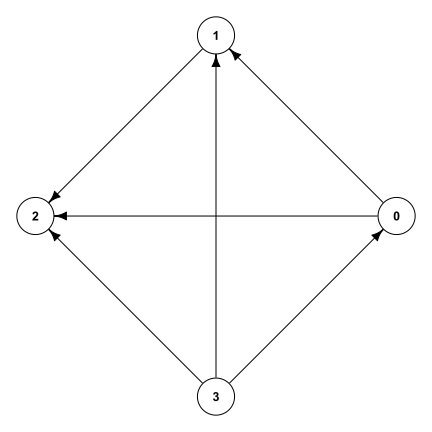

In [2]:
options(repr.plot.width=6, 
        repr.plot.height=6,
        jupyter.plot_mimetypes = "image/svg+xml")

par(mar=rep(0, 4)+.1)

suppressPackageStartupMessages(library(igraph))
el <- matrix(
    c(
        1, 2,
        1, 3,
        2, 3,
        4, 1,
        4, 2,
        4, 3
    ),
    nc = 2,
    byrow = TRUE
)
g <- graph_from_edgelist(el, directed = TRUE)
coords <- layout_in_circle(g, order = V(g))
plot(g, layout = coords, 
     vertex.label = 0:3,
     vertex.size = 20,
     vertex.label.family = 'sans',
     vertex.label.font = 2,
     vertex.color = "white", 
     vertex.label.color = "black", 
     edge.color = "black")

Given a tournament, we need a way to decide who the winner is. A naïve approach would be to look for a player who beats every other player and then crown them the victor. In the example above, this would be player 3. When this can be done, there is no denying that the selected champion is deserving; it is only possible for one player to beat everyone else since each pair of players only compete a single time, hence this player will have won the most games. The problem is, that this dominating player cannot always be found. In fact, it is not difficult at all to construct a counter-example. The smallest $n$ we need to do this is 3, as shown here.

In [ ]:
options(repr.plot.width=6, 
        repr.plot.height=6,
        jupyter.plot_mimetypes = "image/svg+xml")

par(mar=rep(0, 4)+.1)

el <- matrix(
    c(
        1, 2,
        2, 3,
        3, 1
    ),
    nc = 2,
    byrow = TRUE
)
g <- graph_from_edgelist(el, directed = TRUE)
coords <- layout_in_circle(g, order = V(g))
plot(g, layout = coords, 
     vertex.size = 20,
     vertex.label = 0:2,
     vertex.label.family = 'sans',
     vertex.label.font = 2,
     vertex.color = "white", 
     vertex.label.color = "black", 
     edge.color = "black")

The mathematical term for such a violating tournament is a *paradoxical tournament*.

### Generalisation

Another way of thinking about this is that a paradoxical tournament satisfies the property that for every subset of 1 player (i.e. any player), there exists another player that beats every player in that subset (i.e. beats that player). This rewording leads us into thinking about how we can generalise the notion of a paradoxical tournament. We start by renaming a paradoxical tournament as a 1-paradoxical tournament, since the subsets we were considering above only had one player in each of them. 

We can then define a $k$-paradoxical tournament to be a tournament in which for every subset of $k$ players, we can find another player outside of that subset that beat every player in that subset.

### 2-paradoxical Tournaments

For small tournaments, this notion is redundant. For any tournament with 6 or fewer players, it's impossible to have a 2-or-higher-paradoxical tournament as we will prove in a moment. When a seventh player joins, however, everything can start to fall apart and we can find our first 2-paradoxical tournament. Here is the graphical representation of an example that I came up with.

In [ ]:
options(repr.plot.width=6, 
        repr.plot.height=6,
        jupyter.plot_mimetypes = "image/svg+xml")

par(mar=rep(0, 4)+.1)

el <- matrix(
    c(
        1, 2,
        2, 3,
        3, 4,
        4, 5,
        5, 6,
        6, 7,
        7, 1,
        1, 3,
        2, 4,
        3, 5,
        4, 6,
        5, 7,
        6, 1,
        7, 2,
        1, 5,
        2, 6,
        3, 7,
        4, 1,
        5, 2,
        6, 3,
        7, 4
    ),
    nc = 2,
    byrow = TRUE
)
g <- graph_from_edgelist(el, directed = TRUE)
coords <- layout_in_circle(g, order = V(g))
plot(g, layout = coords, 
     vertex.label = 0:6,
     vertex.size = 20,
     vertex.label.family = 'sans',
     vertex.label.font = 2,
     vertex.color = "white", 
     vertex.label.color = "black", 
     edge.color = "black")

You can verify this for yourself. I'll look at a few cases now as an example. Let's start with the 2-subset (0, 1) — both these players were beaten by player 4. Likewise, consider the subset (2, 6) — we can see that player 5 is the common victor. Similar checks can be done for all subsets.

That's great! We know that we can find a 2-paradoxical tournament with seven players, but what about proving that this is the smallest such example. As can be the nature of many graph theory problems, proving lack of existence can be much tougher than finding a clever example. Never-the-less, here is the simplest proof I could come up with, aided by the following graphic.

In [ ]:
options(repr.plot.width=6, 
        repr.plot.height=9,
        jupyter.plot_mimetypes = "image/svg+xml")

par(mar=rep(1, 4), mfrow=c(3,2))

g1 <- make_empty_graph(directed = TRUE) + vertices(1:6)
g1 <- g1 + edges(c(1, 2, 3, 4, 5,6 ), color = "red")
coords <- layout_in_circle(g1, order = V(g1))
plot(g, layout = coords, 
     main = "Graph A",
     vertex.label = 0:5,
     vertex.size = 20,
     vertex.label.family = 'sans',
     vertex.label.font = 2,
     vertex.color = "white", 
     vertex.label.color = "black", 
     edge.color = "red")

g2 <- g1 + edges(c(3, 2, 3, 1), color = "blue")
coords <- layout_in_circle(g2, order = V(g2))
plot(g2, layout = coords, 
     main = "Graph B",
     vertex.label = 0:5,
     vertex.size = 20,
     vertex.label.family = 'sans',
     vertex.label.font = 2,
     vertex.color = "white", 
     vertex.label.color = "black")

g3 <- g1 + edges(c(4, 1, 4, 2), color = "blue")
coords <- layout_in_circle(g3, order = V(g3))
plot(g3, layout = coords, 
     main = "Graph C",
     vertex.label = 0:5,
     vertex.size = 20,
     vertex.label.family = 'sans',
     vertex.label.font = 2,
     vertex.color = "white", 
     vertex.label.color = "black")

g4 <- g3 + edges(c(5, 3, 5, 4), color = "forestgreen")
coords <- layout_in_circle(g4, order = V(g4))
plot(g4, layout = coords, 
     main = "Graph D",
     vertex.label = 0:5,
     vertex.size = 20,
     vertex.label.family = 'sans',
     vertex.label.font = 2,
     vertex.color = "white", 
     vertex.label.color = "black")

g5 <- g3 + edges(c(6, 3, 6, 4), color = "forestgreen")
coords <- layout_in_circle(g5, order = V(g5))
plot(g5, layout = coords, 
     main = "Graph E",
     vertex.label = 0:5,
     vertex.size = 20,
     vertex.label.family = 'sans',
     vertex.label.font = 2,
     vertex.color = "white", 
     vertex.label.color = "black")

g6 <- g5 + edges(c(3, 5), color = "orange")
g6 <- g6 + edges(c(6, 1), color = "purple")
g6 <- g6 + edges(c(2, 5, 2, 6), color = "deeppink")
coords <- layout_in_circle(g6, order = V(g6))
plot(g6, layout = coords, 
     main = "Graph F",
     vertex.label = 0:5,
     vertex.size = 20,
     vertex.label.family = 'sans',
     vertex.label.font = 2,
     vertex.color = "white", 
     vertex.label.color = "black")

The method I intend to use to solve this problem is proof by exhaustion. Perhaps there is a more elegant and concise path of attack but if so, it eludes me. If any reader has a better suggestion of how this can be proved, please get in touch.

We start with graph A in which we arbitrarily orient the three edges between players 0 and 1, 2 and 3, 4 and 5. We can do this without loss of generality since the players are indistinguishable so we could simply re-label at this point. We could continue to arbitrarily orient edges such as the one between vertices 1 and 3 since we could then switch the labels of the pairs $(0,1)$ and $(2,3)$ to enforce generality, but this ends up making the case analysis more complicated. 

We now choose a vertex which will beat the 2-subset $\{0, 1\}$. Since the pairs $(2,3)$ and $(4, 5)$ are indistinguishable, without loss of generality we can choose this dominating vertex to either by 2 or 3.

In the case where we choose vertex 2, we are left with graph B. At this point, we are done since it is impossible for any vertex to beat both players 2 and 4. This is because 2 beats all players but 4 and 5 and the only possible saviour, player 5, beats player 4. We can now turn our attention to the other more complicated case.

If we had instead chosen vertex 3, we would reach graph C. Unfortunately, we cannot stop here as there is still plenty of choice over how we orient our edges. We now consider the two subset $\{2, 3\}$ and try to find a vertex that can beat both of them. Since player 3 beats both player 0 and 1, we are only left with the choice of player 4 or 5.

Suppose we select vertex 4, this gives rise to graph D. We are lucky this time and we can immediately handle this case. This is because there is no player that could possibly beat both players 3 and 4. Indeed player 3 beats both of players 0 and 1, and player 4 does the same for 2 and 5.

If we had instead chosen vertex 5, we would be left with graph E. Every choice we make is now forced, but we still have to make a few additions before we reach a contradiction. 

First we need a vertex which beats both players 3 and 4. This can only be player 2 so we add a yellow edge to denote this. We next observe that the only vertex that can beat both players 0 and 2 is player 5 and so we add the purple edge. Lastly, we spot that the only player that can beat both players 4 and 5 is player 1, giving rise to the addition of the last 2 pink edges.

After all additions have been made, we attain graph F. At this point we observe that no player can beat both players 1 and 5, and so we are done. 

## Diving Deep

Now that we have investigated the behaviour of 1-and-2-paradoxical tournaments, we can turn our attention to larger $k$. 

When researching the more general case, it surprised me how little material on this topic is available online. All Wikipedia has to say on the topic is a single paragraph within the page on general tournaments in graph theory. Further, my two favourite combinatorics textbooks—[Combinatorics and Graph Theory (Harris)](https://www.amazon.co.uk/Combinatorics-Graph-Theory-Undergraduate-Mathematics/dp/0387797106) and [Foundations of Combinatorics with Applications (Bender, Williamson)](https://www.amazon.co.uk/Foundations-Combinatorics-Applications-Dover-Mathematics/dp/0486446034)—make no mention of it. There are a handful of research papers on the topic, though these prefer the name Schutte tournament to paradoxical, yet these are quite dense. My plan is to walk through some strategies on how we can handle general $k$-paradoxical tournaments and try to produce a coherent introductory guide to their study.

### A Brute Force Strategy

I am not the type to shy away from leveraging computation to solve a difficult problem. This, however, is far from a suitable problem for using brute force. 

Consider the 7-player tournament above. It just so happens to be 2-paradoxical but that is only because it was carefully chosen. What if we were to approach the problem by generating all possible tournaments and checking whether they were 2-paradoxical or, more generally, $k$-paradoxical?

For our 7 player example there are 21 edges. You are welcome to count them but a simpler method to come up with this number is to note that each edge can be constructed by picking one of the 7 vertices to start on and then choosing one of the 6 remaining vertices to connect it to. This gives us 42 possible edges but since the edge $\{0,1\}$ is the same as $\{1,0\}$, we need to divide by two to get the true number.

We then have a choice of two orientations for each edge, and so the total number of tournaments is $2^{21} = 2097152$. That is a lot of cases to check, and for each one, proving whether or not a given tournament is $k$-paradoxical is no easy feat. On a powerful computer it would most likely be tractable to find the smallest 2-paradoxical tournament but for larger $k$ we stand no chance.

For a general tournament on $n$ vertices, we can use the argument above to show that there are $\frac{n(n-1)}{2}$ possibilities. We could reduce this slightly by using some symmetry arguments but we will not be able to change the fact that this is $O(n^2)$. Therefore when we exponent this we get something of the order $O(2^{n^2})$ which will quickly become intractable for larger n.

For example, by the time we have a tournament with 25 players, there will be more possibilities than atoms in the observable universe. We will later see that this would be enough to find a 3-paradoxical tournament but not 4-paradoxical. We need a new strategy

### A Constructive Approach

The next thing we will look at is constructive method for finding an upper bound on the smallest tournament that is $k$-paradoxical. This was formulated by Graham and Spencer in 1971<sup>[[src]](https://www.cambridge.org/core/journals/canadian-mathematical-bulletin/article/constructive-solution-to-a-tournament-problem/F6DDB2DE033EE8AD7B5E9BE0EBEDE0D6)</sup> and is known as a Paley tournament. 

In order to look into that we need to take a short tangent into the world of number theory. 

We say that an integer $a$ is a quadratic residue modulo $n$ if an $x$ exists such that $a\equiv x^2 (\textrm{mod } n)$. Let $p$ be a prime such that $p \equiv 3 \, (\textrm{mod } 4)$. We define the edges of a tournament with vertex set $\{0, 1, \ldots, p-1\}$ by directing an edge from $i$ to $j$ if and only if $i-j$ is a quadratic residue of $p$. It can be shown that since $p \equiv 3 \, (\textrm{mod } 4)$, exactly one of $i$ and and $p-i$ is a quadratic residue of $p$ and so the tournament is well-defined.

Graham and Spencer proved that whenever $p$ is chosen such that $p > k^2 2^{2k-2}$ and $p \equiv 3 \, (\textrm{mod } 4)$ as before, then the Paley tournament produced be the process above is $k$-paradoxical. 

The first prime satisfying $p > k^2 2^{2k-2}$ and $p \equiv 3 \,(\textrm{mod } 4)$ for $k = 2$ is $19$ and for $k=3$ it is $151$ These are certainly not optimum solutions but they do offer an upper bound. More precisely, the bound has $O(k^2 4^{k})$ players.

The proof of this requires a strong knowledge of number theory and we've already way too far from home (combinatorics) so I will direct any curious reader to the [original paper](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/F6DDB2DE033EE8AD7B5E9BE0EBEDE0D6/S0008439500057842a.pdf/constructive_solution_to_a_tournament_problem.pdf) on the topic.

#### Tightening Bounds

We can use the idea of quadratic residues to construct smaller examples. The above theorem will be of no use if we don't satisfy its conditions but we can use the concept to construct good 'guesses' for paradoxical tournaments and then verify them using computation.

The quadratic residues of 7 are $\{1,2,4\}$. If you recall from above, these were the sizes of steps that we connected together in to construct the 2-paradoxical tournament above. Meanwhile, the quadratic residues of 19 are $\{1, 4, 5, 6, 7, 9, 11, 16, 17\}$ so if for each vertex $v$ we add a directed edge from $v$ to $(v + 1) \textrm{ mod } 19, \ldots, (v + 17) \textrm{ mod } 19$ we obtain the following graph which so happens to be 3-paradoxical.

In [ ]:
options(repr.plot.width=6, 
        repr.plot.height=6,
        jupyter.plot_mimetypes = "image/svg+xml")

par(mar=rep(0, 4)+.1)

g <- make_empty_graph(directed = TRUE) + vertices(1:19)

for (v in 1:19) {
    for (w in c(1, 4, 5, 6, 7, 9, 11, 16, 17)) {
        g <- g + edge(c(v, (v + w - 1) %% 19 + 1))
    }
}

coords <- layout_in_circle(g, order = V(g))
plot(g, layout = coords, 
     vertex.label = 0:18,
     vertex.size = 10,
     vertex.label.family = 'sans',
     vertex.label.font = 2,
     vertex.color = "white", 
     vertex.label.color = "black", 
     edge.color = "black",
     edge.arrow.size = 0.5)

Perhaps not so easy to verify, but this is indeed 3-paradoxical. It also turns out to be the minimal such tournament<sup>[[src]](https://www.jstor.org/stable/pdf/3612854.pdf)</sup>. 

### Probabilistic Methods

As we just saw, the bounds obtained using the constructive method are very weak. Perhaps we could do better if we relax the need to find an explicit example. This is where probabilistic methods come in; we can use some stochastic magic to show that, even though we may not be able to find it, at least on tournament of a certain size $n$ is $k$-paradoxical. This method is based on a paper by Erdős published in 1963<sup>[[src]](https://www.renyi.hu/~p_erdos/1963-08.pdf)</sup>.

Before we reach a final value of n for which we can be sure that a $k$-paradoxical tournament exists, we need to proof an intermediate theorem:

The proof of this has a distinctly probabilistic flavour to it. First we consider a random tournament on $n$ vertices where $n$ is chosen such that the assumptions of the theorem hold. We then fix a subset of size $k$, $K$, and let $A_K$ denote the random event that there is no vertex beating all elements in $K$. 

Since edges are oriented independently and uniformly, the probability of any specific vertex beating every vertex in $K$ is $2^{-k}$. There the probability of such a vertex *not* beating every vertex in $K$ is $1-2^{-k}$. Using independence again we see that the probability of no vertex beating all elements in $K$, $\mathbb{P}(A_K)$ is $(1-2^{-k})^{n-k}$, as there are $n-k$ vertices not in $K$ each of which has probability $1-2^{-k}$ of satisfying the property. 

Now by sub-additivity (also know as Boole's inequality) we have that

$$\mathbb{P}\left(\bigcup_{|K|=k}A_K\right) \leq \sum_{|K|=k} \mathbb{P}(A_K) = {n \choose k} (1-2^{-k})^{n-k}$$

Where the last step comes from the fact that there are $n \choose k$ ways to choose a k-subset from $n$ vertices. Therefore, by the assumption of the theorem we have

$$\mathbb{P}\left(\bigcup_{|K|=k}A_K\right) \lt 1$$

Since the probability of the event $\bigcup_{|K|=k}A_K$ is less than one, its complement, $\bigcap_{|K|=k}A_K^C$ must occur with non-zero probability. It follows that there must at least one tournament on the $n$ vertices which satisfies $\bigcap_{|K|=k}A_K^C$, that is, a tournament in which every k-subset has at least one vertex beating all elements of the subset as we required.

So what bounds does this give us? For $k=2$, trying our know optimum $n = 7$ gives ${7 \choose 2}\frac{3}{4}^5 = 4.983\ldots\gg 1$. It is actually not until $n = 21$ that the theorem condition is satisfied. This is even worse than the bound of 19 that the constructive method gave us.

By $k=3$, however, things have improved. The first $n$ satisfying the inequality is 91, much less than the value of 151 given by the constructive approach. This may suggest that the probabilistic method has a more favourable asymptotic than the constructive approach. We will explore the in more detail in a moment.

#### Limiting Behaviour

An interesting observation is that for any $k>1$, we have that $\lim_{n\to\infty}{n \choose k}(1-2^{-k})^{n-k} = 1$. Indeed

$$
\begin{align}
{n \choose k}(1-2^{-k})^{n-k} &\lt \frac{n^k}{k!}(1-2^{-k})^{n-k} \\
&\lt n^k(1-2^{-k})^{n-k} \\
&\leq n^k(1-2^{-k})^{\frac{n}{2}} & \textrm{for } n \geq 2k\\
&= n^kC^{n} & \textrm{with } C = \sqrt{1-2^{-k}} \lt 1\\
\end{align}
$$


It is clear that the right hand side tends to zero as $n\to\infty$ and so so must the left hand side by the squeeze rule. The implication of this is that ,for any given $k$, if we have a tournament with enough players, it is very likely (or as $n\to\infty$, almost certain) that a random tournament of that size will be $k$-paradoxical. It just can't be avoided!

#### Comparison to Constructive Approach

As we saw early, the constructive method gives us a $k$-paradoxical tournament with $O(k^2 4^{k})$ players. Does this new probabilistic method improve on this bound? It turns out that it, as we will now see. Take $k>1$ and observe that

$$
\begin{align}
{n \choose k}(1-2^{-k})^{n-k} &\lt \frac{n^k}{k!}(1-2^{-k})^{n-k} \\
&\lt \frac{n^k}{k!}\exp\left(-2^{-k}\right)^{n-k} & [1+x \leq e^x] \\
&= \frac{n^k}{k!}\exp\left(-(n-k)2^{-k}\right) \\
&\lt n^k\exp\left(-n 2^{-k}\right)  & [\textrm{Stirling's Bound}]
\end{align}
$$

Now choose $n > 2^k k^2 \ln(2+\epsilon)$ for some $\epsilon > 0$ and suppose for contradiction that there is no $k$-paradoxical graph on $n$ vertices. By the theorem above we must have that $1 \leq {n \choose k}(1-2^{-k})^{n-k}$ and so from the previous working it follows that

$$
\begin{align}
& 1 \lt n^k\exp\left(-n 2^{-k}\right) \\
\iff & 1 \lt n\exp\left(-nk 2^{-k}\right) \\
\iff & 1 \lt n^{\frac{1}{n}}\exp\left(-k 2^{-k}\right) \\
\iff &  \exp\left(k 2^{-k}\right) \lt  n^{\frac{1}{n}} \\
\iff & \frac{1}{k2^k} \lt \frac{\ln n}{n}
\end{align}
$$

Now,, since $\frac{\ln n}{n}$ is decreasing for $n\geq3$ and, by assumption, $n > 2^k k^2 \ln(2+\epsilon) \geq 3$, for $k>1$ we have that

$$\frac{1}{k2^k} \lt \frac{\ln q}{q} \qquad \textrm{with } q = 2^k k^2 \ln(2+\epsilon)$$

That is to say that

$$k\ln(2 + \epsilon) \lt \ln(2^k k^2 \ln(2+\epsilon))$$

Which is

$$\ln(2 + \epsilon) \lt \ln(2) + \frac{1}{k}\ln(k^2 \ln(2+\epsilon))$$

This however will not hold for any $\epsilon>0$ if we choose $k$ to be large enough. Therefore, for sufficiently large $k$, whenever $n > 2^k k^2 \ln(2+\epsilon)$, we will have at least one $k$-paradoxical tournament on $n$ vertices.

It follows from this that there exists a $k$-paradoxical tournament with $O(k^2 2^k)$ players. This is a massive improvement on the $O(k^2 4^k)$ players that we had before. In fact, it is almost the square root of the original complexity

### Lower Bounds

So far we have taken a look at some upper bounds, that is, how many players we need before it is certain that we can find a $k$-paradoxical tournament. But what of lower bounds? What is the minimum number of players that we require before a $k$-paradoxical tournament could even be possible. An inductive argument can show that we must have at least $2^{k+1} - 1$ players for a tournament to be $k$-paradoxical. It goes like this.

We know that this inequality holds for $k=1$ — a tournament with less than $2^2-1=3$ players certainly can't be paradoxical. We proceed inductively. Suppose that the statement holds for $k = m-1$ for some integer $m > 1$; we want to show that, under this assumption, it also holds for $k=m$.

Suppose, for contradiction, that this is not the case. That means that we have a graph $G^{(n)}$ which is $m$-paradoxical but with $n \leq 2^{m+1} - 2$. For each vertex $v$ of $G^{(n)}$, let $G^{(n)}(v)$ denote the set of starting points of all edges of $G^{(n)}$ which end at $v$, that is, the set of vertices which are beating $v$.

As we showed in 'A Brute Force Strategy', $G^{(n)}$ has $\frac{1}{2}n(n-1)$ edges, so at least one of $G^{(n)}(v)$ must have $\frac{1}{2}(n-1)$ elements or fewer by the Pigeonhole Principle. Let $v^*$ be such a vertex with $G^{(n)}(v^*)=:N\leq\frac{1}{2}(n-1)$. Since we assumed that $n \leq 2^{m+1} -2$, it follows that $N \leq 2^m - 2$.

We now have two possibilities to look at:
1. $N \geq m - 1$ 
2. $N \lt m -1$

We start with the first case. Our plan of attack is to show that $G^{(n)}(v^*)$ is $(m-1)$-paradoxical. It then would follow from our inductive hypothesis that $N \geq 2^m - 1$ which contradicts that $N \leq 2^m -2$.

Let $V$ be any set of any $m-1$ elements of $G^{(n)}(v^*)$. Since $G^{(n)}$ is $m$-paradoxical by assumption, and $V \cup v^*$ is of size $n$, we must be able to find a vertex $w$ which beats all of $V \cup v^*$. In particular, this means that $w$ beats $v^*$ and so $w \in G^{(n)}(v^*)$ by definition. Since this is true for arbitrary $V$, we have that $G^{(n)}(v^*)$ is $(m-1)$-paradoxical, giving the contradiction mentioned above.

We now turn our attention to the second case. Take $G^{(n)}(v^*)$ and add any $m-1-N$ vertices from $G^{(n)}$, excluding $v^*$, to obtain an $m-1$ vertex subgraph $G^{(m-1)}$. This subgraph will be $(m-1)$-paradoxical. Why? Let's see:

Consider the vertices of $G^{(m-1)}$ along with $v^*$. This forms a set of $m$ vertices in $G^{(n)}$ and since we have assumed that this is $m$-paradoxical, we can find $w$ as before that beats all of $G^{(m-1)}$ and $v^*$. Using the same argument as before, $w\in G^{(m-1)}$. But this is impossible since $G^{(m-1)}$ has $m-1$ vertices all of which are beaten by $w \in G^{(m-1)}$, implying the existence an $m$th vertex.

Either way, we arrive at a contradiction. Hence it must be the case that $n \gt 2^{m+1} - 2$ and we are done.

#### Improving Bounds

This bound was improved by Esther and George Szekeres in 1965 to $(k+2)2^{k-1}-1$<sup>[[src]](https://www.jstor.org/stable/pdf/3612854.pdf?seq=1#page_scan_tab_contents)</sup>. But this blog post is already very long so we will leave it their and move on to summarising these results.

## Summary

We have covered an incredible amount of material on $k$-paradoxical tournaments in just one post so I suggest that it would be beneficial to summarise all of the results we have arrived at in a table. 

As eluded to in the table, we are still yet to have found the optimal values of $n$ for $k$ bigger than 3. Looking at the Szekeres Lower Bound is it is clear that using traditional computing, this problem is completely intractable for a brute force approach. Never-the-less breakthroughs in the field could open up new possibilities but for now, it's probably best to close your console and get back to pen and paper if you really want to make any progress. 

At this point, I would normally suggest further reading, but frankly, we have exhausted almost all of what the literature has to offer. Perhaps the next step would be to have a look at the original source documents that I have used to write this post (using `ctrl-F` to search for 'src' will help you find those).